In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

In [17]:
df = pd.read_csv('Top performing country.csv')

In [18]:
df

,TerritoryID,Name,CountryRegionCode,Total_Sales,LatestOrderDate
0,4,Southwest,US,2.715059e+07,00:00.0
1,6,Canada,CA,1.839893e+07,00:00.0
2,1,Northwest,US,1.806166e+07,00:00.0
3,9,Australia,AU,1.181438e+07,00:00.0
4,3,Central,US,8.913299e+06,00:00.0
5,5,Southeast,US,8.884099e+06,00:00.0
6,10,United Kingdom,GB,8.574049e+06,00:00.0
7,7,France,FR,8.119749e+06,00:00.0
8,2,Northeast,US,7.820210e+06,00:00.0
9,8,Germany,DE,5.479820e+06,00:00.0


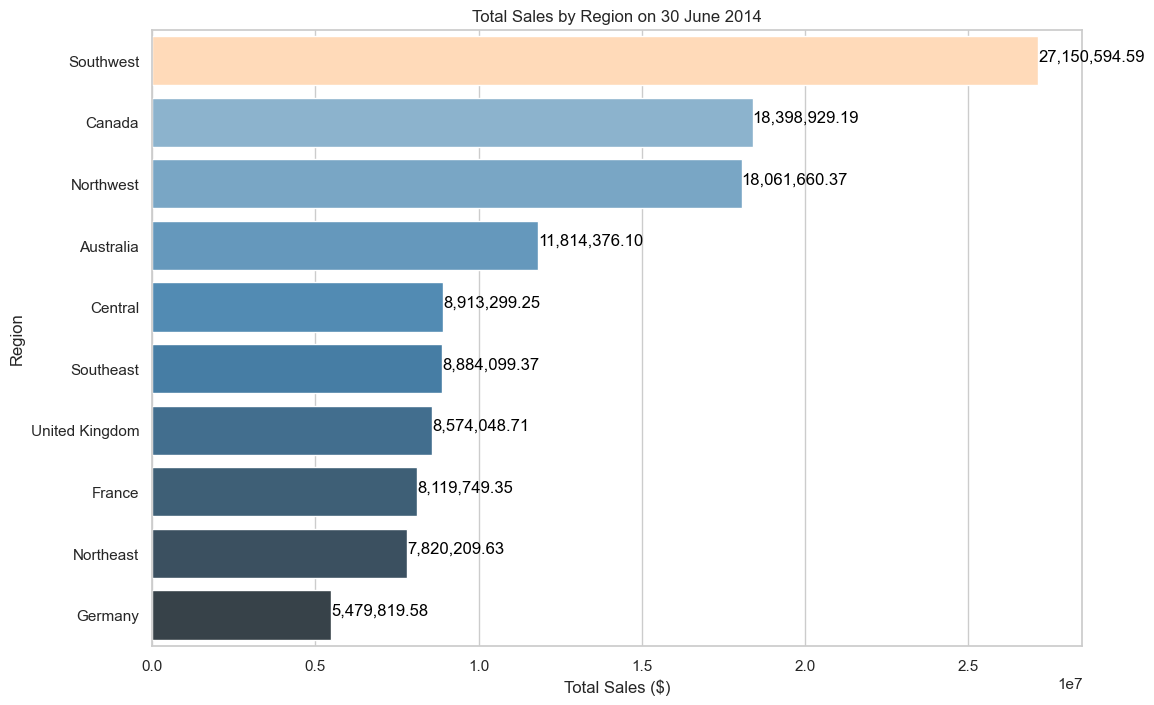

In [19]:

# Remove any commas and convert Total_Sales to float
df['Total_Sales'] = df['Total_Sales'].replace('[\$,]', '', regex=True).astype(float)

# Sort the DataFrame by Total_Sales in descending order
df = df.sort_values(by='Total_Sales', ascending=False)

# Set the style
sns.set(style="whitegrid")

# Create a barplot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Total_Sales', y='Name', data=df, palette='Blues_d')

# Highlight the top sales region
for index, row in df.iterrows():
    barplot.text(row.Total_Sales, index, f'{row.Total_Sales:,.2f}', color='black', ha="left")
    if row.Name == 'Southwest':
        barplot.patches[index].set_facecolor('peachpuff')  

plt.title('Total Sales by Region on 30 June 2014')
plt.xlabel('Total Sales ($)')
plt.ylabel('Region')
plt.show()

In [21]:

# Convert Total_Sales to float
df['Total_Sales'] = df['Total_Sales'].replace('[\$,]', '', regex=True).astype(float)

# Group data by CountryRegionCode
def custom_agg(group):
    if group.name == 'US':
        return pd.Series({
            'Name': 'All_US-Regions',
            'Total_Sales': group['Total_Sales'].sum()
        })
    else:
        return pd.Series({
            'Name': ', '.join(group['Name']),
            'Total_Sales': group['Total_Sales'].sum()
        })

grouped_df = df.groupby('CountryRegionCode').apply(custom_agg).reset_index()

# The result
grouped_df

,CountryRegionCode,Name,Total_Sales
0,AU,Australia,1.181438e+07
1,CA,Canada,1.839893e+07
2,DE,Germany,5.479820e+06
3,FR,France,8.119749e+06
4,GB,United Kingdom,8.574049e+06
5,US,All_US-Regions,7.082986e+07


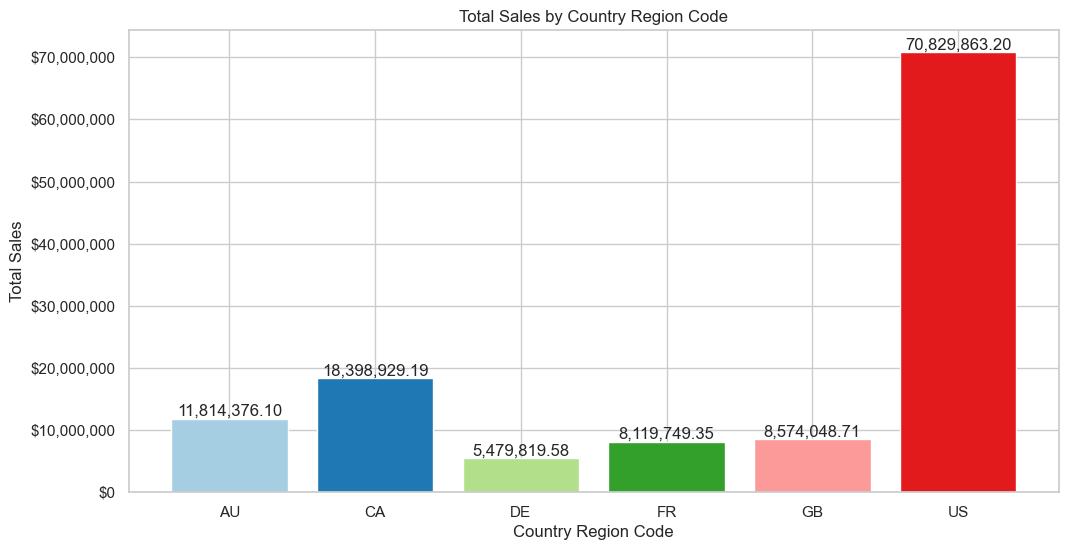

In [23]:

# Convert Total_Sales to float
df['Total_Sales'] = df['Total_Sales'].replace('[\$,]', '', regex=True).astype(float)


# Group data by CountryRegionCode
def custom_agg(group):
    if group.name == 'US':
        return pd.Series({
            'Name': 'All_US-Regions',
            'Total_Sales': group['Total_Sales'].sum()
        })
    else:
        return pd.Series({
            'Name': ', '.join(group['Name']),
            'Total_Sales': group['Total_Sales'].sum()
        })

grouped_df = df.groupby('CountryRegionCode').apply(custom_agg).reset_index()

# Create a barplot
plt.figure(figsize=(12, 6))
colors = plt.cm.Paired(range(len(grouped_df)))  
bars = plt.bar(grouped_df['CountryRegionCode'], grouped_df['Total_Sales'], color=colors)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.2f}', ha='center', va='bottom')

plt.xlabel('Country Region Code')
plt.ylabel('Total Sales')
plt.title('Total Sales by Country Region Code')

# Formatting the Y-axis to display thousand separators
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.show()